# 1. Introduction

This project is the fourth assignment in the course - Machine Learning with Python-From Linear Models to Deep Learning by MITx. This course is part of the MITx MicroMasters Program in Statistics and Data Science. For further details, please visit (https://www.edx.org/course/machine-learning-with-python-from-linear-models-to).

The project is aimed at building a mixture model for collaborative filtering. It is based on a data matrix containing movie ratings made by users where the matrix is extracted from a much larger Netflix database. Any particular user has rated only a small fraction of the movies so the data matrix is only partially filled. The goal is to predict all the remaining entries of the matrix.

We will use mixtures of Gaussians to solve this problem. The model assumes that each user's rating profile is a sample from a mixture model. In other words, $K$ possible types of users are given and, in the context of each user, I must sample a user type and then the rating profile from the Gaussian distribution associated with the type. The Expectation Maximization (EM) algorithm will be implemented to estimate such a mixture from a partially observed rating matrix. The EM algorithm proceeds by iteratively assigning (softly) users to types (E-step), and subsequently re-estimating the Gaussians associated with each type (M-step). Once the mixture is available, all the missing entries in the data matrix can be predicted accordingly.

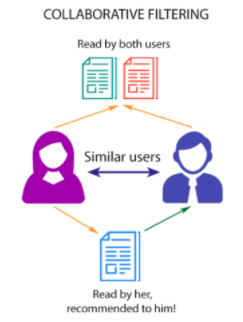

**Properties of data:**
- toy_data.txt a 2D dataset that you will work with in tabs 2-5
- netflix_incomplete.txt the netflix dataset with missing entries to be completed
- netflix_complete.txt the netflix dataset with missing entries completed
- test_incomplete.txt a test dataset to test for you to test your code against our implementation
- test_complete.txt a test dataset to test for you to test your code against our implementation
- test_solutions.txt a test dataset to test for you to test your code against our implementation

# 2. K-means

We will compare clustering obtained via K-means to the (soft) clustering induced by EM in this part. In order to do so, our K-means algorithm will differ a bit from the one you learned. Here, the means are estimated exactly as before but the algorithm returns additional information. More specifically, we use the resulting clusters of points to estimate a Gaussian model for each cluster. Thus, our K-means algorithm actually returns a mixture model where the means of the component Gaussians are the $K$ centroids computed by the K-means algorithm. This is to make it such that we can now directly plot and compare solutions returned by the two algorithms as if they were both estimating mixtures.

Using `X = np.loadtxt('toy_data.txt')`, we will run the K-means algorithm on this data by initializing K-means using `common.init(X, K, seed)`, where $K$ is the number of clusters and `seed` is the random seed used to randomly initialize the parameters.

Note that `init(X,K)` returns a K-component mixture model with means, variances and mixing proportions. The K-means algorithm will only care about the means, however, and returns a mixture that is retrofitted based on the K-means solution.

We will review $K$=[1,2,3,4] on this data, plotting each solution using our `common.plot` function. Since the initialization is random, we will use seeds 0,1,2,3,4 to and select the one that minimizes the total cost.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Arc
%matplotlib inline
from typing import NamedTuple, Tuple

In [2]:
X = np.loadtxt('toy_data.txt')
X[:5,:]

array([[-1.636,  2.413],
       [-2.957,  2.296],
       [-2.871,  1.832],
       [-2.696,  1.327],
       [-2.272,  1.738]])

In [3]:
class GaussianMixture(NamedTuple):
    """Tuple holding a gaussian mixture"""
    mu: np.ndarray  # (K, d) array - each row corresponds to a gaussian component mean
    var: np.ndarray  # (K, ) array - each row corresponds to the variance of a component
    p: np.ndarray  # (K, ) array = each row corresponds to the weight of a component

In [4]:
def init(X: np.ndarray, K: int,
         seed: int = 0) -> Tuple[GaussianMixture, np.ndarray]:
    """Initializes the mixture model with random points as initial
    means and uniform assingments

    Args:
        X: (n, d) array holding the data
        K: number of components
        seed: random seed

    Returns:
        mixture: the initialized gaussian mixture
        post: (n, K) array holding the soft counts
            for all components for all examples

    """
    np.random.seed(seed)
    n, _ = X.shape
    p = np.ones(K) / K

    # select K random points as initial means
    mu = X[np.random.choice(n, K, replace=False)]
    var = np.zeros(K)
    # Compute variance
    for j in range(K):
        var[j] = ((X - mu[j])**2).mean()

    mixture = GaussianMixture(mu, var, p)
    post = np.ones((n, K)) / K

    return mixture, post

In [5]:
def plot(X: np.ndarray, mixture: GaussianMixture, post: np.ndarray,
         title: str):
    """Plots the mixture model for 2D data"""
    _, K = post.shape

    percent = post / post.sum(axis=1).reshape(-1, 1)
    fig, ax = plt.subplots()
    ax.title.set_text(title)
    ax.set_xlim((-20, 20))
    ax.set_ylim((-20, 20))
    r = 0.25
    color = ["r", "b", "k", "y", "m", "c"]
    for i, point in enumerate(X):
        theta = 0
        for j in range(K):
            offset = percent[i, j] * 360
            arc = Arc(point,
                      r,
                      r,
                      0,
                      theta,
                      theta + offset,
                      edgecolor=color[j])
            ax.add_patch(arc)
            theta += offset
    for j in range(K):
        mu = mixture.mu[j]
        sigma = np.sqrt(mixture.var[j])
        circle = Circle(mu, sigma, color=color[j], fill=False)
        ax.add_patch(circle)
        legend = "mu = ({:0.2f}, {:0.2f})\n stdv = {:0.2f}".format(
            mu[0], mu[1], sigma)
        ax.text(mu[0], mu[1], legend)
    plt.axis('equal')
    plt.show()

In [6]:
# K = 1, seeds = [0,1,2,3,4]
k1 = []
for i in range(5):
    k1.append(init(X, 1, i))

# K = 2, seeds = [0,1,2,3,4]
k2 = []
for i in range(5):
    k2.append(init(X, 2, i))
    
# K = 3, seeds = [0,1,2,3,4]
k3 = []
for i in range(5):
    k3.append(init(X, 3, i))
    
# K = 4, seeds = [0,1,2,3,4]
k4 = []
for i in range(5):
    k4.append(init(X, 4, i))

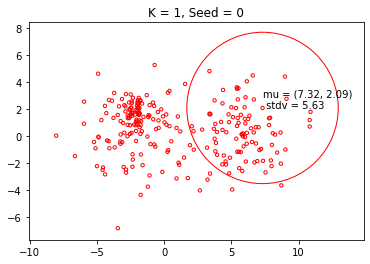

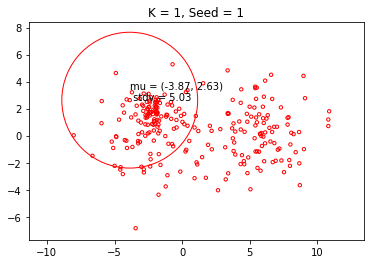

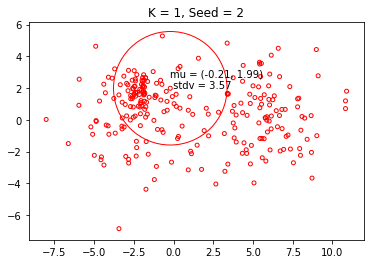

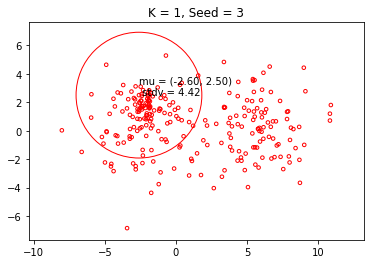

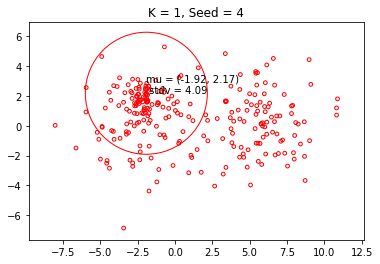

In [7]:
# plot k = 1, seeds = [0,1,2,3,4]
for i in range(5):
    plot(X, k1[i][0], k1[i][1], f'K = 1, Seed = {i}')

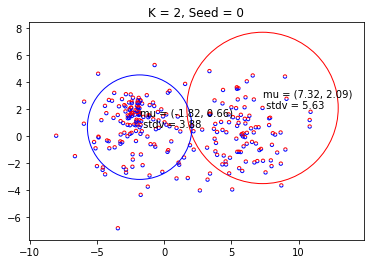

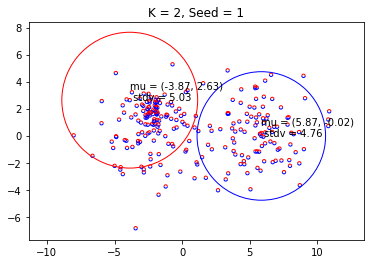

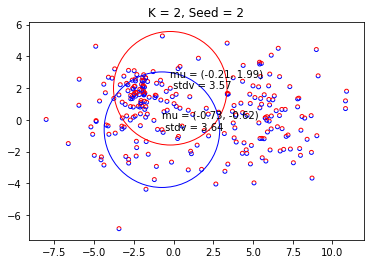

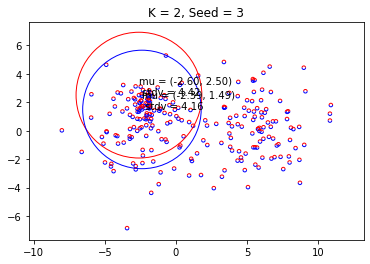

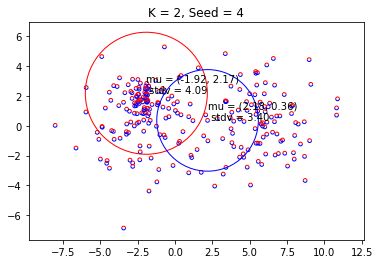

In [8]:
# plot k = 2, seeds = [0,1,2,3,4]
for i in range(5):
    plot(X, k2[i][0], k2[i][1], f'K = 2, Seed = {i}')

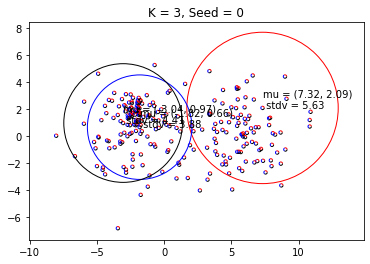

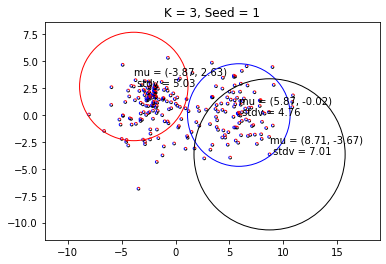

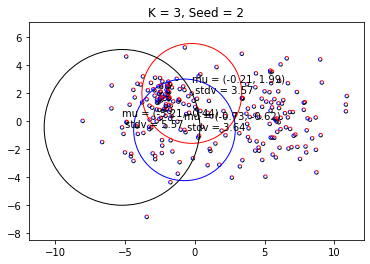

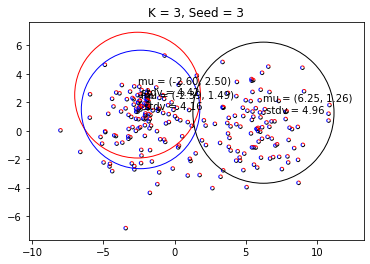

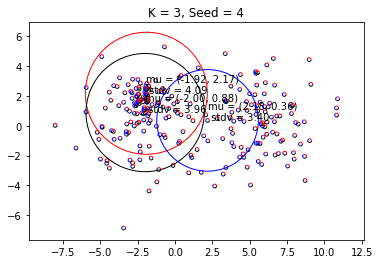

In [9]:
# plot k = 3, seeds = [0,1,2,3,4]
for i in range(5):
    plot(X, k3[i][0], k3[i][1], f'K = 3, Seed = {i}')

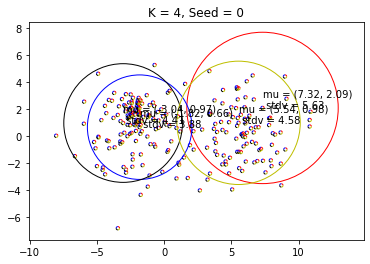

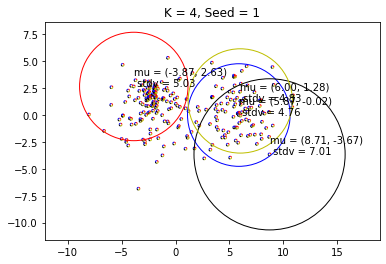

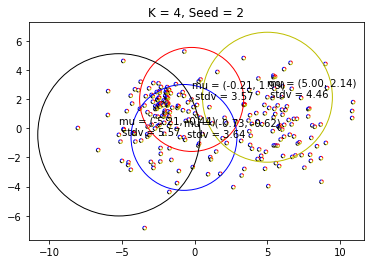

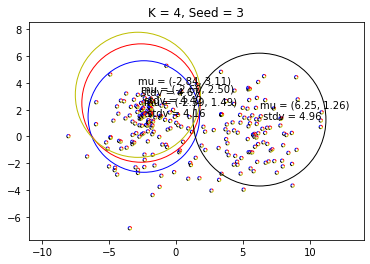

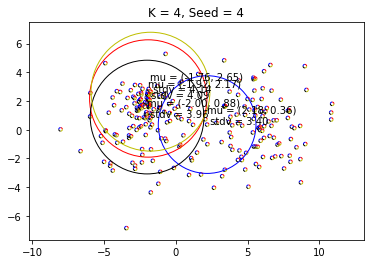

In [10]:
# plot k = 4, seeds = [0,1,2,3,4]
for i in range(5):
    plot(X, k4[i][0], k4[i][1], f'K = 4, Seed = {i}')

In [13]:
def estep(X: np.ndarray, mixture: GaussianMixture) -> np.ndarray:
    """E-step: Assigns each datapoint to the gaussian component with the
    closest mean

    Args:
        X: (n, d) array holding the data
        mixture: the current gaussian mixture

    Returns:
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples

        """
    n, _ = X.shape
    K, _ = mixture.mu.shape
    post = np.zeros((n, K))

    for i in range(n):
        tiled_vector = np.tile(X[i, :], (K, 1))
        sse = ((tiled_vector - mixture.mu)**2).sum(axis=1)
        j = np.argmin(sse)
        post[i, j] = 1

    return post

In [14]:
def mstep(X: np.ndarray, post: np.ndarray) -> Tuple[GaussianMixture, float]:
    """M-step: Updates the gaussian mixture. Each cluster
    yields a component mean and variance.

    Args: X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        float: the distortion cost for the current assignment
    """
    n, d = X.shape
    _, K = post.shape

    n_hat = post.sum(axis=0)
    p = n_hat / n

    cost = 0
    mu = np.zeros((K, d))
    var = np.zeros(K)

    for j in range(K):
        mu[j, :] = post[:, j] @ X / n_hat[j]
        sse = ((mu[j] - X)**2).sum(axis=1) @ post[:, j]
        cost += sse
        var[j] = sse / (d * n_hat[j])

    return GaussianMixture(mu, var, p), cost

In [15]:
def run(X: np.ndarray, mixture: GaussianMixture,
        post: np.ndarray) -> Tuple[GaussianMixture, np.ndarray, float]:
    """Runs the mixture model

    Args:
        X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples
        float: distortion cost of the current assignment
    """

    prev_cost = None
    cost = None
    while (prev_cost is None or prev_cost - cost > 1e-4):
        prev_cost = cost
        post = estep(X, mixture)
        mixture, cost = mstep(X, post)

    return mixture, post, cost

In [16]:
k_cost = np.zeros([4,5])

for i in range(5):
    k_cost[0][i] = (run(X, k1[i][0],k1[i][0][2])[2])
    k_cost[1][i] = (run(X, k2[i][0],k2[i][0][2])[2])
    k_cost[2][i] = (run(X, k3[i][0],k3[i][0][2])[2]) 
    k_cost[3][i] = (run(X, k4[i][0],k4[i][0][2])[2]) 
    
print(f'Cost min. at K=1, Seed={np.argmin(k_cost[0])}:', np.min(k_cost[0]))
print(f'Cost min. at K=2, Seed={np.argmin(k_cost[1])}:', np.min(k_cost[1]))
print(f'Cost min. at K=3, Seed={np.argmin(k_cost[2])}:', np.min(k_cost[2]))
print(f'Cost min. at K=4, Seed={np.argmin(k_cost[3])}:', np.min(k_cost[3]))

Cost min. at K=1, Seed=0: 5462.297452340001
Cost min. at K=2, Seed=0: 1684.9079502962372
Cost min. at K=3, Seed=3: 1329.5948671544297
Cost min. at K=4, Seed=4: 1035.4998265394659


# 3. Expectation-maximization Algorithm

The Gaussian mixture model:

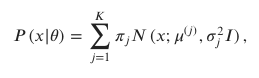
 
where $\theta$ denotes all the parameters in the mixture (means $\mu^{(j)}$), mixing proportions $\pi_{j}$, and variances $\sigma_{j}^{2}$).

The goal of the EM algorithm is to estimate these unknown parameters by maximizing the log-likelihood of the observed data  $x^{(1)}...x^{(n)}$. Starting with some initial guess of the unknown parameters, the algorithm iterates between E- and M-steps.

The E-Step softly assigns each data point $x^{(i)}$ to mixture components. The M-step takes these soft-assignments as given and finds a new setting of the parameters by maximizing the log-likelihood of the weighted dataset (expected complete log-likelihood).

Implement the EM algorithm for the Gaussian mixture model desribed above. The convergence criteria should be used is that the improvement in the log-likelihood is less than or equal to $10^{−6}$  multiplied by the absolute value of the new log-likelihood. In slightly more algebraic notation:  new log-likelihood−old log-likelihood $\leqslant$ $10^{−6}$⋅∣new log-likelihood∣.

The code should output updated versions of a GaussianMixture (with means mu, variances var and mixing proportions p) as well as an $(n,K)$ Numpy array post, where  post$[i,j]$  is the posterior probability $p(j|x^{i})$, and LL which is the log-likelihood of the weighted dataset.

### Implementing E-step

Write a function `estep` that performs the E-step of the EM algorithm.

In [17]:
from scipy.special import logsumexp
from scipy.stats import norm

In [18]:
# example
init(X, 1, 0)[0]

GaussianMixture(mu=array([[7.317, 2.091]]), var=array([31.65873375]), p=array([1.]))

In [19]:
def estep(X: np.ndarray, mixture: GaussianMixture) -> Tuple[np.ndarray, float]:
    """E-step: Softly assigns each datapoint to a gaussian component

    Args:
        X: (n, d) array holding the data, with incomplete entries (set to 0)
        mixture: the current gaussian mixture

    Returns:
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples
        float: log-likelihood of the assignment

    """
    n, d = X.shape
    mu, var, pi = mixture
    K = mu.shape[0]
    
    norm_term = 1 / ((2 * np.pi * var)**(d / 2))
    post = norm_term * np.exp((-1 / (2 * var)) * np.linalg.norm(X[:,np.newaxis] - mu, axis=2)**2)
    
    like = pi * post
    like_sum = like.sum(axis=1).reshape(-1,1)
    
    post = like / like_sum
    log_like = np.sum(np.log(like_sum), axis=0)
    
    return post, log_like

### Implementing M-step

Write a function `mstep` that performs the M-step of the EM algorithm.

In [20]:
def mstep(X: np.ndarray, post: np.ndarray) -> GaussianMixture:
    """M-step: Updates the gaussian mixture by maximizing the log-likelihood
    of the weighted dataset

    Args:
        X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
    """
    n, d = X.shape
    _, K = post.shape
    
    nj = post.sum(axis=0)
    pi = nj / n
    mu = np.dot(post.T, X) / nj.reshape(-1,1)
    var = (post * (np.linalg.norm(X[:,np.newaxis] - mu, axis=2)**2)).sum(axis=0) / (d * nj)
    
    return GaussianMixture(mu, var, pi)

### Implementing run

Write a function run that runs the EM algorithm, the convergence criterion is described above.

In [21]:
def run(X: np.ndarray, mixture: GaussianMixture,
        post: np.ndarray) -> Tuple[GaussianMixture, np.ndarray, float]:
    """Runs the mixture model

    Args:
        X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples
        float: log-likelihood of the current assignment
    """
    old_ll = 0
    new_ll = 0
    
    while (new_ll - old_ll > 1e-6 * abs(new_ll)) or (old_ll == 0):
        old_ll = new_ll
        post, new_ll = estep(X, mixture)
        mixture = mstep(X, post)
        
    return mixture, post, new_ll

In [22]:
# example
run(X, k1[0][0], k1[0][1])[0::2]

(GaussianMixture(mu=array([[1.064496, 0.550068]]), var=array([10.9245949]), p=array([1.])),
 array([-1307.22343176]))

#  4. Comparing K-means and EM

Generate analogous plots to K-means using the EM implementation. As the EM algorithm can also get stuck in a locally optimal solution, we wil run the EM algorithm with seeds 0,1,2,3,4 for each value of $K$, and select the solution that achieves the highest log-likelihood. Then, we will compare the K-means and mixture solutions for $K$=[1,2,3,4].

### Reporting log likelihood values

In [23]:
k_ml = np.zeros([4,5])

for i in range(5):
    k_ml[0][i] = (run(X, k1[i][0],k1[i][1])[2])
    k_ml[1][i] = (run(X, k2[i][0],k2[i][1])[2])
    k_ml[2][i] = (run(X, k3[i][0],k3[i][1])[2])
    k_ml[3][i] = (run(X, k4[i][0],k4[i][1])[2])
    
print(f'Max. log-likelihood at K=1, Seed={np.argmin(k_ml[0])}:', np.min(k_ml[0]))
print(f'Max. log-likelihood at K=2, Seed={np.argmin(k_ml[1])}:', np.min(k_ml[1]))
print(f'Max. log-likelihood at K=3, Seed={np.argmin(k_ml[2])}:', np.min(k_ml[2]))
print(f'Max. log-likelihood at K=4, Seed={np.argmin(k_ml[3])}:', np.min(k_ml[3]))

Max. log-likelihood at K=1, Seed=0: -1307.2234317600935
Max. log-likelihood at K=2, Seed=1: -1175.7148637279554
Max. log-likelihood at K=3, Seed=1: -1138.891526858204
Max. log-likelihood at K=4, Seed=1: -1138.891045633598


### Analysing plots

According to below plots, we can find below properties for different K's.

- The K=1 case is exactly the same since all the data is assigned to the same cluster and both methods compute the mean.
- The K=2 case is very similar in terms of cluster mean and point assignment, but since EM uses a spherical Gaussian model with varying deviations the points midway between the two are assigned slightly differently.
- The K=3 case equally spaces the clusters for k-means to minimize the overall distortion cost, but the left two clusters for EM are closely packed with very different variances because EM wants to account for the densely set of points on the left side.
- The K=4 case is similar to the K=3 case where all of the clusters in k-means are equally spaced to minimize distortion cost correct, but the EM has significant overlap on the left side.

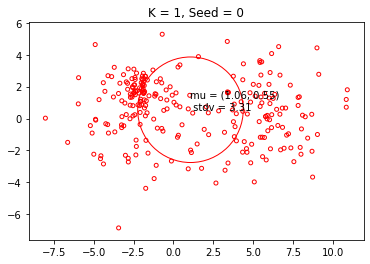

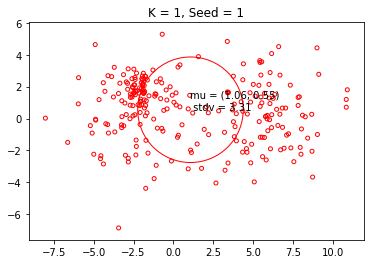

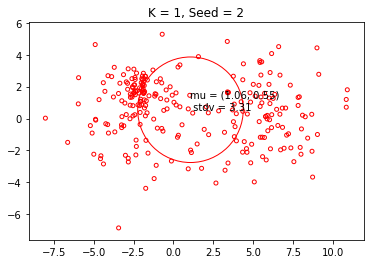

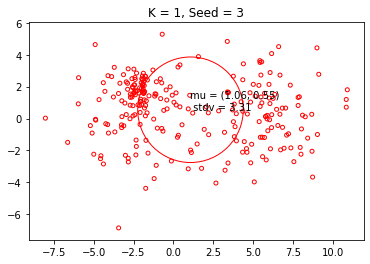

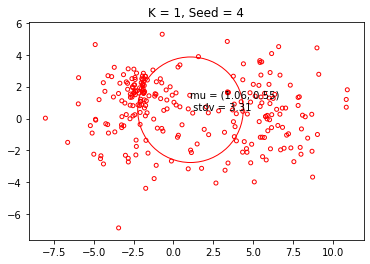

In [24]:
# plot k = 1, seeds = [0,1,2,3,4]
for i in range(5):
    arg1 = run(X, k1[i][0], k1[i][1])[0]
    arg2 = run(X, k1[i][0], k1[i][1])[1]
    plot(X, arg1, arg2, f'K = 1, Seed = {i}')

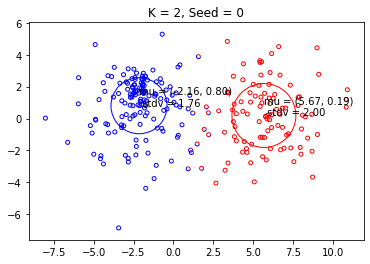

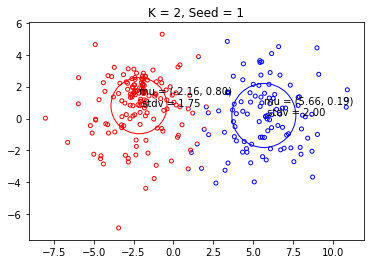

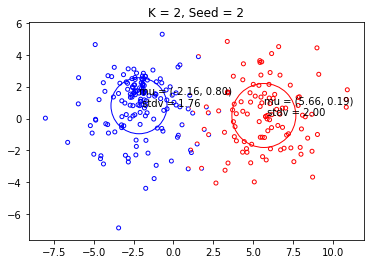

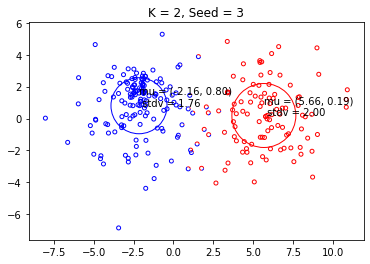

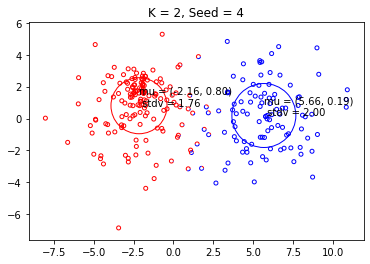

In [25]:
# plot k = 2, seeds = [0,1,2,3,4]
for i in range(5):
    arg1 = run(X, k2[i][0], k2[i][1])[0]
    arg2 = run(X, k2[i][0], k2[i][1])[1]
    plot(X, arg1, arg2, f'K = 2, Seed = {i}')

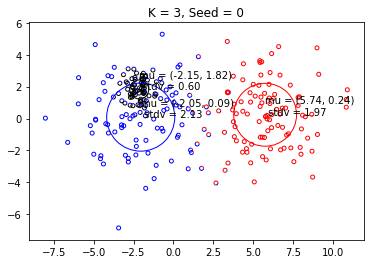

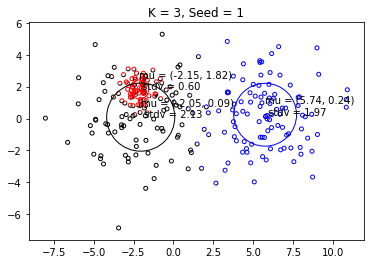

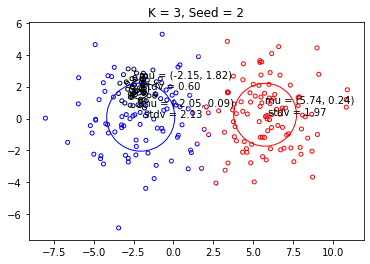

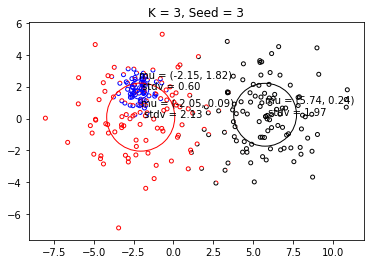

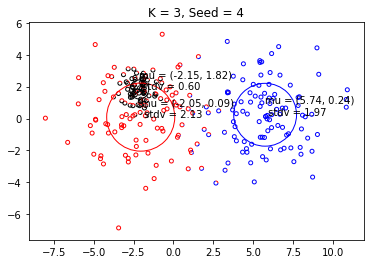

In [26]:
# plot k = 3, seeds = [0,1,2,3,4]
for i in range(5):
    arg1 = run(X, k3[i][0], k3[i][1])[0]
    arg2 = run(X, k3[i][0], k3[i][1])[1]
    plot(X, arg1, arg2, f'K = 3, Seed = {i}')

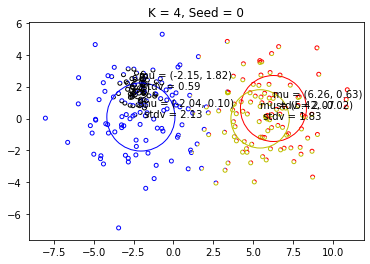

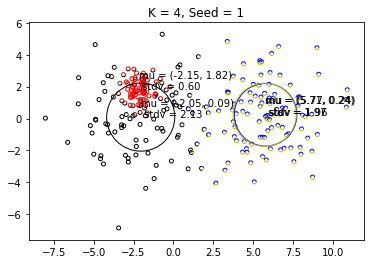

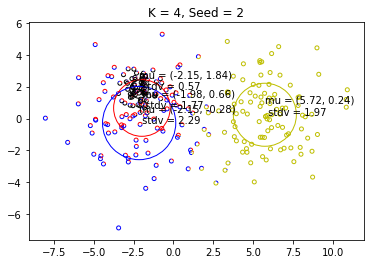

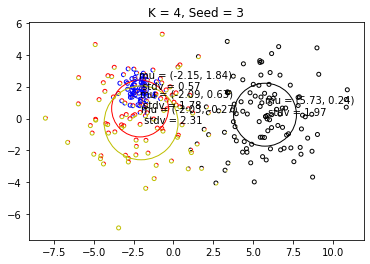

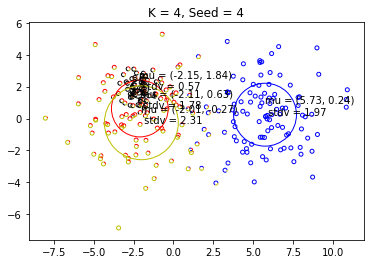

In [27]:
# plot k = 4, seeds = [0,1,2,3,4]
for i in range(5):
    arg1 = run(X, k4[i][0], k4[i][1])[0]
    arg2 = run(X, k4[i][0], k4[i][1])[1]
    plot(X, arg1, arg2, f'K = 4, Seed = {i}')

# 5. Bayesian Information Criterion

So far we have simply set the number of mixture components $K$ but this is also a parameter that we must estimate from data. How does the log-likelihood of the data vary as a function of $K$ assuming we avoid locally optimal solutions?

To compensate, we need a selection criterion that penalizes the number of parameters used in the model. The Bayesian information criterion (BIC) is a criterion for model selection. It captures the tradeoff between the log-likelihood of the data, and the number of parameters that the model uses. The BIC of a model $M$ is defined as:
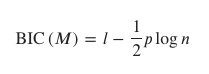
where $l$ is the log-likelihood of the data under the current model (highest log-likelihood we can achieve by adjusting the parameters in the model), $p$ is the number of free parameters, and $n$ is the number of data points. This score rewards a larger log-likelihood, but penalizes the number of parameters used to train the model. In a situation where we wish to select models, we want a model with the the highest BIC.

### Implementing the Bayesian Information Criterion

Write a function `bic` for Bayesian Information Criterion (BIC) calculation.

In [28]:
def bic(X: np.ndarray, mixture: GaussianMixture,
        log_likelihood: float) -> float:
    """Computes the Bayesian Information Criterion for a
    mixture of gaussians

    Args:
        X: (n, d) array holding the data
        mixture: a mixture of spherical gaussian
        log_likelihood: the log-likelihood of the data

    Returns:
        float: the BIC for this mixture
    """
    n, d = X.shape
    p = mixture[0].shape[0] * mixture[0].shape[1] + mixture[0].shape[1] * 2 - 1
    bic = log_likelihood - 1/2 * p * np.log(n)
    return bic

### Picking the best K

Find the best $K$ from [1,2,3,4] on the toy dataset. We can see [3] is the best $K$ that produces the optimal BIC score. Measure the BIC on EM models only, it selects the correct number of clusters for the toy data.

In [29]:
k_bic = np.zeros([4,5])

for i in range(5):
    k_bic[0][i] = (bic(X, k1[i][0], k_ml[0][i]))
    k_bic[1][i] = (bic(X, k2[i][0], k_ml[1][i]))
    k_bic[2][i] = (bic(X, k3[i][0], k_ml[2][i]))
    k_bic[3][i] = (bic(X, k4[i][0], k_ml[3][i]))
    
print(f'Optimal BIC score at K=1, Seed={np.argmax(k_bic[0])}:', np.max(k_bic[0]))
print(f'Optimal BIC score at K=2, Seed={np.argmax(k_bic[1])}:', np.max(k_bic[1]))
print(f'Optimal BIC score at K=3, Seed={np.argmax(k_bic[2])}:', np.max(k_bic[2]))
print(f'Optimal BIC score at K=4, Seed={np.argmax(k_bic[3])}:', np.max(k_bic[3]))

Optimal BIC score at K=1, Seed=0: -1321.0270840547491
Optimal BIC score at K=2, Seed=2: -1195.0397425791975
Optimal BIC score at K=3, Seed=0: -1163.7374738176472
Optimal BIC score at K=4, Seed=4: -1168.9692107477272


# Mixture models for matrix completion

We can now extend the Gaussian mixture model to predict actual movie ratings. Let $X$ again denote the $(n,d)$ data matrix. The rows of this matrix correspond to users and columns specify movies so that X[u,i] gives the rating value of user $u$ for movie $i$ (if available). Both $n$ and $d$ are typically quite large. The ratings range from one to five stars and are mapped to integers {1,2,3,4,5}. We will set X[u,i]=0 whenever the entry is missing.

In a realistic setting, most of the entries of $X$ are missing. For this reason, we define $C_{u}$ as the set of movies (column indexes) that user $u$ has rated and $H_{u}$ as its complement (the set of remaining unwatched/unrated movies we wish to predict ratings for). We use $|C_{u}|$ to denote the number of observed rating values from user $u$. From the point of view of our mixture model, each user $u$ is an example $x^{(u)}$= X[u,:]. But since most of the coordinates of $x^{(u)}$ are missing, we need to focus the model during training on just the observed portion. To this end, we use  $x_{Cu}^{(u)}=x_{i}^{(u)}:𝑖∈C_{u}$ as the vector of only observed ratings. If columns are indexed as  {0,…,$d-1$} , then a user $u$ with a rating vector $x^{(u)}$=(5,4,0,0,2), where zeros indicate missing values, has $C_{u}$={0,1,4} , $H_{u}$={2,3} , and  $x_{Cu}^{(u)}$=(5,4,2) .


In this part, we will extend our mixture model in two key ways.

- First, we are going to estimate a mixture model based on partially observed ratings. See notes below.

- Second, since we will be dealing with a large, high-dimensional data set, we will need to be more mindful of numerical underflow issues. To this end, you should perform most of your computations in the log domain. Remember, $log(a⋅b)=log(a)+log(b)$. This can be useful to remember when $a$ and $b$ are very small – in these cases, addition should result in fewer numerical underflow issues than multiplication.

The LogSumExp trick is an additional numerical optimization trick. Assume that we wish to evaluate $y=log(exp(x_{1})+...exp(x_{n}))$. We define $x^{*}=max[x_{1}...x_{n}$]. Then, $y=x^{*}+log(exp(x_{1}-x^{*})+...exp(x_{n}-x^{*}))$. This is just another trick to help ensure numerical stability.

# 7. Implementing EM for matrix completion

### Implementing E-step (2)

Write an updated `estep` function so that it works with partially observed vectors where missing values are indicated with zeros, and perform the computations in the log domain to help with numerical stability.

In [30]:
def estep(X: np.ndarray, mixture: GaussianMixture) -> Tuple[np.ndarray, float]:
    """E-step: Softly assigns each datapoint to a gaussian component

    Args:
        X: (n, d) array holding the data, with incomplete entries (set to 0)
        mixture: the current gaussian mixture

    Returns:
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples
        float: log-likelihood of the assignment

    """
    n, d = X.shape
    mu, var, pi = mixture
    K,_ = mu.shape
    
    f = np.zeros((n,K)) # matrix for f(u,i)
    for i in range(n):
        cuid = X[i,:] > 0
        norm_term = (-np.sum(cuid) / 2) * np.log(2 * np.pi * var) # log form of normalizing term w/ Cu index
        exp_term = np.sum(((X[i, cuid] - mu[:,cuid])**2), axis=1) / (2 * var) # log form of exp term w/ Cu index
        f[i] = norm_term - exp_term
        
    f += np.log(pi + 1e-16)
    log_sum = logsumexp(f, axis=1).reshape(-1,1)
    post = np.exp(f - log_sum)
    log_like = log_sum.sum(axis=0)

    return post, log_like

### Implementing M-step (2)

Write an updated `mstep` function so that it works with partially observed vectors where missing values are indicated with zeros, and perform the computations in the log domain to help with numerical stability.

In [31]:
def mstep(X: np.ndarray, post: np.ndarray, mixture: GaussianMixture,
          min_variance: float = .25) -> GaussianMixture:
    """M-step: Updates the gaussian mixture by maximizing the log-likelihood
    of the weighted dataset

    Args:
        X: (n, d) array holding the data, with incomplete entries (set to 0)
        post: (n, K) array holding the soft counts
            for all components for all examples
        mixture: the current gaussian mixture
        min_variance: the minimum variance for each gaussian

    Returns:
        GaussianMixture: the new gaussian mixture
    """
    n, d = X.shape
    _, K = post.shape
    mu, _, _ = mixture
    cuid = X > 0
    
    # nj and pi part
    nj = post.sum(axis=0)
    pi = nj / n
    
    # mu part
    mu_numerator = np.dot(post.T, X)
    mu_denominator = np.dot(post.T, cuid)
    mu_idx = np.where(mu_denominator >= 1)
    mu[mu_idx] = mu_numerator[mu_idx] / mu_denominator[mu_idx]
    
    # var part
    diff = np.zeros((n,K))
    for i in range(n):
        var_idx = X[i,:] > 0
        diff[i,:] = ((X[i, var_idx] - mu[:, var_idx])**2).sum(axis=1)
    
    var_denominator = (post * cuid.sum(axis=1).reshape(-1,1)).sum(axis=0)
    var = ((post * diff).sum(axis=0)) / var_denominator
    var = np.maximum(var, min_variance)
    
    return GaussianMixture(mu, var, pi)

### Implementing run

Write an updated `run` function so that it runs the EM algorithm. As before, the convergence criteria that you should use is that the improvement in the log-likelihood is less than or equal to  10−6  multiplied by the absolute value of the new log-likelihood.

In [32]:
def run(X: np.ndarray, mixture: GaussianMixture,
        post: np.ndarray) -> Tuple[GaussianMixture, np.ndarray, float]:
    """Runs the mixture model

    Args:
        X: (n, d) array holding the data
        post: (n, K) array holding the soft counts
            for all components for all examples

    Returns:
        GaussianMixture: the new gaussian mixture
        np.ndarray: (n, K) array holding the soft counts
            for all components for all examples
        float: log-likelihood of the current assignment
    """
    old_ll = 0
    new_ll = 0
    
    while (new_ll - old_ll > 1e-6 * abs(new_ll)) or (old_ll == 0):
        old_ll = new_ll
        post, new_ll = estep(X, mixture)
        mixture = mstep(X, post, mixture)
        
    return mixture, post, new_ll

# 8. Using the mixture model for collaborative filtering

### Reporting log likelihood values on Netflix data

Now, run the EM algorithm on the incomplete data matrix from Netflix ratings netflix_incomplete.txt. As before, we will use seeds from [0,1,2,3,4] and report the best log likelihood achieved with $K=1$  and $K=12$.

In [33]:
netflix = np.loadtxt('netflix_incomplete.txt')
netflix

array([[2., 4., 5., ..., 4., 4., 4.],
       [3., 5., 5., ..., 5., 3., 4.],
       [2., 0., 4., ..., 4., 4., 3.],
       ...,
       [2., 3., 5., ..., 3., 4., 2.],
       [3., 4., 0., ..., 4., 5., 4.],
       [3., 0., 5., ..., 5., 4., 0.]])

In [34]:
# K = 1, seeds = [0,1,2,3,4]
netflix_k1 = []
for i in range(5):
    netflix_k1.append(init(netflix, 1, i))

# K = 12, seeds = [0,1,2,3,4]
netflix_k12 = []
for i in range(5):
    netflix_k12.append(init(netflix, 12, i))

In [37]:
ll_netflix = np.zeros([2,5])

for i in range(5):
    ll_netflix[1][i] = run(netflix, netflix_k12[i][0], netflix_k12[i][1])[2]
    
#print(f'Max. log-likelihood at K=1, Seed={np.argmin(ll_netflix[0])}:', np.min(ll_netflix[0]))
print(f'Max. log-likelihood at K=12, Seed={np.argmax(ll_netflix[1])}:', np.max(ll_netflix[1]))

Max. log-likelihood at K=12, Seed=1: -1390234.4223469393


In [36]:
ll_netflix = np.zeros([2,5])

for i in range(5):
    ll_netflix[0][i] = run(netflix, netflix_k1[i][0], netflix_k1[i][1])[2]
#    ll_netflix[1][i] = run(netflix, netflix_k12[i][0], netflix_k12[i][1])[2]
    
print(f'Max. log-likelihood at K=1, Seed={np.argmax(ll_netflix[0])}:', np.max(ll_netflix[0]))
#print(f'Max. log-likelihood at K=12, Seed={np.argmax(ll_netflix[1])}:', np.max(ll_netflix[1]))

Max. log-likelihood at K=1, Seed=0: -1521060.9539852478


### Completing missing entries

Now that we have a mixture model, how do we use it to complete a partially observed rating matrix? Derive an expression for completing a particular row, say $x_{C}$ where the observed values are $i∈C$.

Implemnt the function `fill_matrix` that takes as input an incomplete data matrix `X` as well as a mixture model, and outputs a completed version of the matrix `X_pred`.

In [44]:
X_gold = np.loadtxt('netflix_complete.txt')
X_gold

array([[2., 4., 5., ..., 4., 4., 4.],
       [3., 5., 5., ..., 5., 3., 4.],
       [2., 4., 4., ..., 4., 4., 3.],
       ...,
       [2., 3., 5., ..., 3., 4., 2.],
       [3., 4., 5., ..., 4., 5., 4.],
       [3., 4., 5., ..., 5., 4., 4.]])

In [47]:
def fill_matrix(X: np.ndarray, mixture: GaussianMixture) -> np.ndarray:
    """Fills an incomplete matrix according to a mixture model

    Args:
        X: (n, d) array of incomplete data (incomplete entries =0)
        mixture: a mixture of gaussians

    Returns
        np.ndarray: a (n, d) array with completed data
    """
    mu, _, _ = mixture
    empty_idx = (X==0)
    X_pred = X.copy()
    
    post = estep(X, mixture)[0]    
    X_pred[empty_idx] = np.dot(post, mu)[empty_idx]
    
    return X_pred

### Comparing with gold targets

Test the accuracy of the predictions against actual target values by loading the complete matrix   and measuring the root mean squared error between the two matrices using RMSE.

In [48]:
def rmse(X, Y):
    return np.sqrt(np.mean((X - Y)**2))

In [49]:
netflix_max = run(netflix, netflix_k12[1][0], netflix_k12[1][1])

In [50]:
X_pred = fill_matrix(netflix, netflix_max[0])

In [51]:
print(f'RMSE = {rmse(X_gold, X_pred)}')

RMSE = 0.48371070127569266


# Thank you!